In [7]:
import numpy as np
import dataIO
from sklearn import svm, preprocessing, cross_validation
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix
reload(dataIO)

left, right = dataIO.read_twothumb(6) # USERID

X = np.array(left+right)
y = np.array([0 for x in range(len(left))]+ [1 for x in range(len(right))])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

scaler = preprocessing.StandardScaler().fit(X_train)  
X_scaled = scaler.transform(X_train)
test_scaled = scaler.transform(X_test)

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [10, 1, 0.1, 1e-2, 1e-3],
                     'C': [0.001, 0.01, 0.1 ,1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1 ,1, 10, 100, 1000]}]


clf = GridSearchCV(svm.SVC(C=1, cache_size=500), tuned_parameters) 
clf.fit(X_scaled, y_train)

print("Best parameters set found on training set:")
print
print clf.best_estimator_
print

y_true, y_pred = y_test, clf.predict(test_scaled)
cm = confusion_matrix(y_true, y_pred)
print "Confusion matrix:"
print
print(cm)
print


Best parameters set found on training set:

SVC(C=100, cache_size=500, class_weight=None, coef0=0.0, degree=3, gamma=0.1,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Confusion matrix:

[[30 11]
 [16 35]]



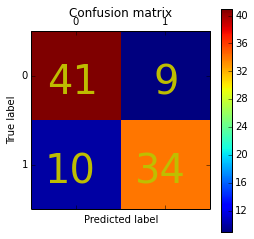

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

for i, cas in enumerate(cm):
    for j, c in enumerate(cas):
        if c<10:
            plt.text(j-.1, i+.2, c, fontsize=40, color='y')
        else:
            plt.text(j-.3, i+.2, c, fontsize=40, color='y')
            
plt.show()